<a href="https://colab.research.google.com/github/ag22042008/data-Science-notebooks/blob/main/ipl2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ipl2025=pd.read_csv('/content/matches.csv')

Dataset Understanding

How many matches were played in IPL 2025?

How many teams participated?

List all venues used in the season.

Matches played per venue.

Matches played per team.

Runs & Match Overview

Total runs scored in IPL 2025.

Average runs per match.

Highest and lowest team score.

Distribution of runs per innings (histogram).

Number of high-scoring matches (200+ total runs).

Toss & Results

Toss winners: how many chose bat vs field?

Match wins after winning the toss.

Win percentage while chasing vs batting first.

Matches won by runs vs wickets.

Margin of victory distribution.

In [4]:
ipl2025

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 27,2025","Ekana Cricket Stadium, Lucknow",LSG,RCB,League,RCB,Bowl,227.0,3.0,...,completed,RCB,NaN,6,8.0,Jitesh Sharma,Rishabh Pant,118.0,Will O'Rourke,2--74
70,71,"May 29,2025","New PCA Cricket Stadium, Mullanpur",PBKS,RCB,Playoffs,RCB,Bowl,101.0,10.0,...,completed,RCB,NaN,8,60.0,Suyash Sharma,Phil Salt,56.0,Suyash Sharma,3--17
71,72,"May 30,2025","New PCA Cricket Stadium, Mullanpur",GT,MI,Playoffs,MI,Bat,228.0,5.0,...,completed,MI,20,NaN,0.0,Rohit Sharma,Rohit Sharma,81.0,Sai Kishore,2--42
72,73,"June 1,2025","Narendra Modi Stadium, Ahmedabad",PBKS,MI,Playoffs,PBKS,Bowl,203.0,6.0,...,completed,PBKS,NaN,5,6.0,Shreyas Iyer,Shreyas Iyer,87.0,Azmatullah Omarzai,2--43


In [6]:
ipl2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             74 non-null     int64  
 1   date                 74 non-null     object 
 2   venue                74 non-null     object 
 3   team1                74 non-null     object 
 4   team2                74 non-null     object 
 5   stage                74 non-null     object 
 6   toss_winner          73 non-null     object 
 7   toss_decision        74 non-null     object 
 8   first_ings_score     73 non-null     float64
 9   first_ings_wkts      73 non-null     float64
 10  second_ings_score    72 non-null     float64
 11  second_ings_wkts     72 non-null     float64
 12  match_result         74 non-null     object 
 13  match_winner         71 non-null     object 
 14  wb_runs              34 non-null     object 
 15  wb_wickets           38 non-null     objec

In [7]:
# handling null values
ipl2025.isnull().sum()

,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,1
toss_decision,0
first_ings_score,1
first_ings_wkts,1


In [13]:
ipl2025.fillna(0,inplace=True)

In [14]:
ipl2025.isnull().sum()

,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,0
toss_decision,0
first_ings_score,0
first_ings_wkts,0


How many matches were played in IPL 2025?

In [29]:
ipl1=ipl2025['match_id'].value_counts().sum()

In [30]:
ipl1

np.int64(74)

How many teams participated?

In [31]:
ipl2025.head(5)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,0,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,0,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,0,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,0,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,0,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30


In [49]:
ipl3=ipl2025['team1'].unique()

In [51]:
ipl3

array(['KKR', 'SRH', 'CSK', 'DC', 'GT', 'RR', 'MI', 'LSG', 'RCB', 'PBKS'],
      dtype=object)

In [55]:
print(f'total no of teams participated in ipl2025 is {len(ipl3)}and names of the teams are {ipl3}')

total no of teams participated in ipl2025 is 10and names of the teams are ['KKR' 'SRH' 'CSK' 'DC' 'GT' 'RR' 'MI' 'LSG' 'RCB' 'PBKS']


List all venues used in the season.

In [57]:
iplvenues=ipl2025['venue'].unique()

In [58]:
iplvenues

array(['Eden Gardens, Kolkata',
       'Rajiv Gandhi International Stadium, Hyderabad',
       'MA Chidambaram Stadium, Chennai',
       'ACA-VDCA Cricket Stadium, Vishakhapatnam',
       'Narendra Modi Stadium, Ahmedabad', 'Barsapara Stadium, Guwahati',
       'Wankhede Stadium, Mumbai', 'Ekana Cricket Stadium, Lucknow',
       'M. Chinnaswamy Stadium, Bangalore',
       'New PCA Cricket Stadium, Mullanpur',
       'Sawai Mansingh Stadium, Jaipur', 'Arun Jaitley Stadium, Delhi',
       'HPCA Stadium, Dharamshala'], dtype=object)

#Matches played per venue.

In [60]:
iplvenue=ipl2025['venue'].value_counts()

In [61]:
iplvenue

,count
venue,
"Narendra Modi Stadium, Ahmedabad",9
"Ekana Cricket Stadium, Lucknow",8
"Eden Gardens, Kolkata",7
"Wankhede Stadium, Mumbai",7
"Arun Jaitley Stadium, Delhi",7
"Sawai Mansingh Stadium, Jaipur",7
"New PCA Cricket Stadium, Mullanpur",6
"Rajiv Gandhi International Stadium, Hyderabad",6
"MA Chidambaram Stadium, Chennai",6


<Axes: ylabel='venue'>

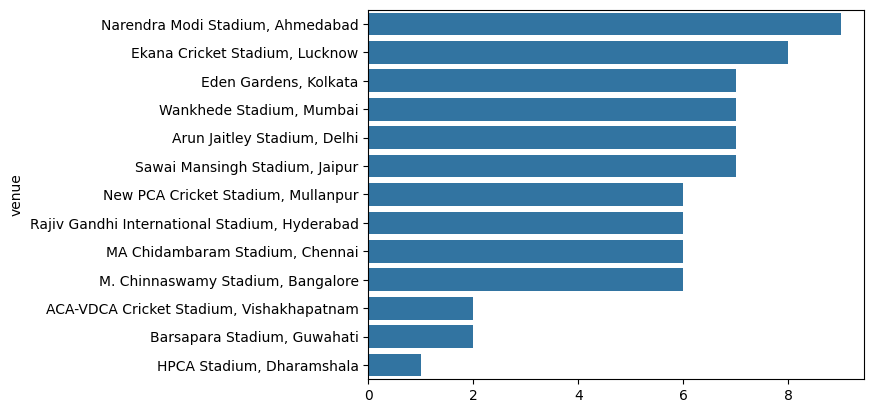

In [62]:
sns.barplot(y=iplvenue.index,x=iplvenue.values)

#Matches played per team.

In [66]:
iplteam=ipl2025['team1'].value_counts()+ipl2025['team2'].value_counts()

In [67]:
iplteam

,count
CSK,14
DC,14
GT,15
KKR,14
LSG,14
MI,16
PBKS,17
RCB,16
RR,14
SRH,14


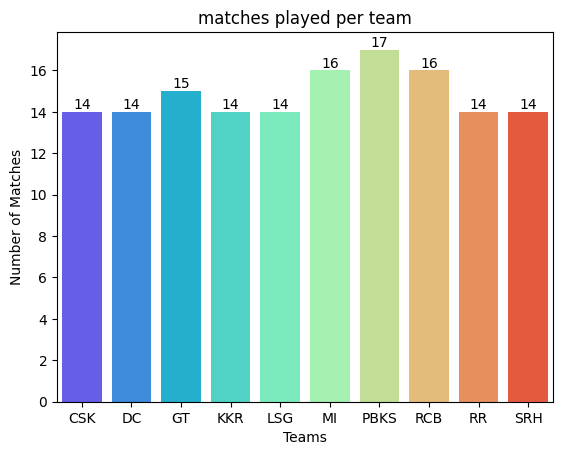

In [74]:
ax = sns.barplot(x=iplteam.index, y=iplteam.values, palette='rainbow')
for container in ax.containers:
    ax.bar_label(container)

plt.title('matches played per team')
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.show()

#Total runs scored in IPL 2025 in each playoff match.

In [76]:
ipl2025['total_score_per_match']=ipl2025['first_ings_score']+ipl2025['second_ings_score']

In [77]:
ipl2025

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,total_score_per_match
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,RCB,0,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29,351.0
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,SRH,44,0,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44,528.0
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,CSK,0,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18,313.0
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,DC,0,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42,420.0
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,PBKS,11,0,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30,475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 27,2025","Ekana Cricket Stadium, Lucknow",LSG,RCB,League,RCB,Bowl,227.0,3.0,...,RCB,0,6,8.0,Jitesh Sharma,Rishabh Pant,118.0,Will O'Rourke,2--74,457.0
70,71,"May 29,2025","New PCA Cricket Stadium, Mullanpur",PBKS,RCB,Playoffs,RCB,Bowl,101.0,10.0,...,RCB,0,8,60.0,Suyash Sharma,Phil Salt,56.0,Suyash Sharma,3--17,207.0
71,72,"May 30,2025","New PCA Cricket Stadium, Mullanpur",GT,MI,Playoffs,MI,Bat,228.0,5.0,...,MI,20,0,0.0,Rohit Sharma,Rohit Sharma,81.0,Sai Kishore,2--42,436.0
72,73,"June 1,2025","Narendra Modi Stadium, Ahmedabad",PBKS,MI,Playoffs,PBKS,Bowl,203.0,6.0,...,PBKS,0,5,6.0,Shreyas Iyer,Shreyas Iyer,87.0,Azmatullah Omarzai,2--43,410.0


In [105]:
ipl2025runs=ipl2025[['match_id','total_score_per_match','team1','team2']].tail(4)

In [106]:
ipl2025runs

,match_id,total_score_per_match,team1,team2
70,71,207.0,PBKS,RCB
71,72,436.0,GT,MI
72,73,410.0,PBKS,MI
73,74,374.0,RCB,PBKS


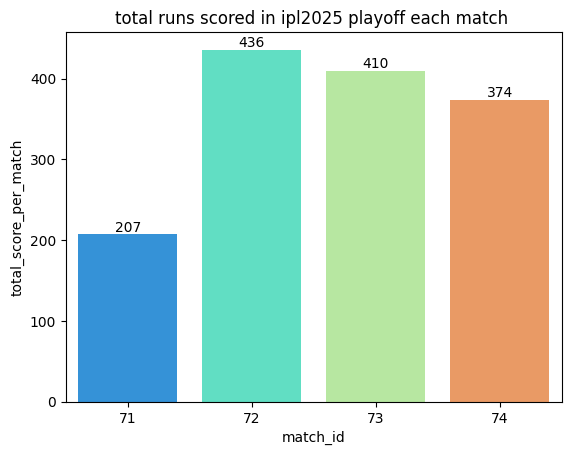

In [108]:
ax=sns.barplot(x=ipl2025runs['match_id'],y=ipl2025runs['total_score_per_match'],palette='rainbow')
plt.title('total runs scored in ipl2025 playoff each match ')
for container in ax.containers:
    ax.bar_label(container)

#points table per team from each match

In [118]:
ipl5 = ipl2025[ipl2025['match_winner'] != 0]['match_winner'].value_counts()*2

,count
match_winner,
PBKS,22
RCB,20
GT,18
MI,16
DC,16
SRH,12
LSG,12
KKR,10
CSK,8


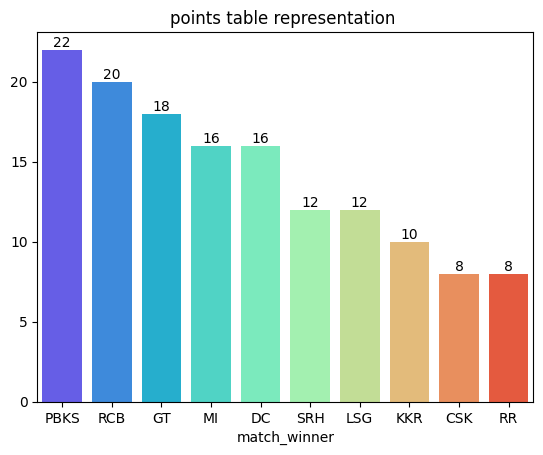

In [120]:
ax=sns.barplot(x=ipl5.index,y=ipl5.values,palette='rainbow')
plt.title('points table representation ')
for container in ax.containers:
    ax.bar_label(container)

In [130]:
ipl6 = ipl2025[ipl2025['top_scorer'] != 0][['top_scorer', 'highscore']]

In [141]:
ipl7=ipl6.groupby('top_scorer').max().sort_values(by='highscore',ascending=False)

In [145]:
# “Top 10 highest individual scores in IPL 2025”
ipl8=ipl7.head(15)

In [146]:
type(ipl8)

pandas.core.frame.DataFrame

In [147]:
ipl8

,highscore
top_scorer,
Abhishek Sharma,141.0
Rishabh Pant,118.0
Mitchell Marsh,117.0
Sai Sudarshan,108.0
Ishan Kishan,106.0
Heinrich Klassen,105.0
Priyansh Arya,103.0
Vaibhav Suryavanshi,101.0
Jos Buttler,97.0


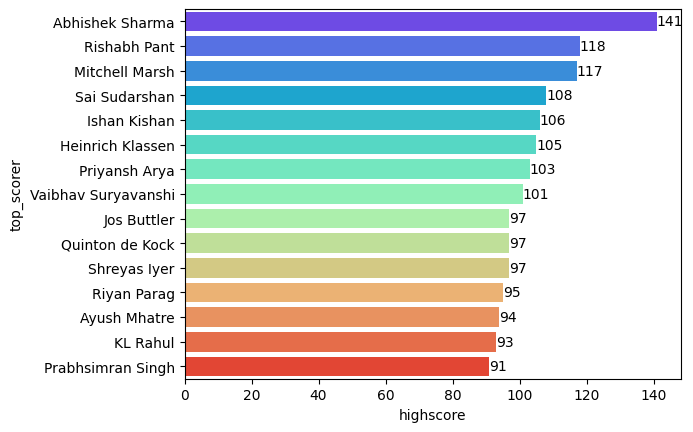

In [149]:
ax=sns.barplot(y=ipl8.index,x=ipl8['highscore'],palette='rainbow')
for container in ax.containers:
    ax.bar_label(container)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_id               74 non-null     int64  
 1   date                   74 non-null     object 
 2   venue                  74 non-null     object 
 3   team1                  74 non-null     object 
 4   team2                  74 non-null     object 
 5   stage                  74 non-null     object 
 6   toss_winner            74 non-null     object 
 7   toss_decision          74 non-null     object 
 8   first_ings_score       74 non-null     float64
 9   first_ings_wkts        74 non-null     float64
 10  second_ings_score      74 non-null     float64
 11  second_ings_wkts       74 non-null     float64
 12  match_result           74 non-null     object 
 13  match_winner           74 non-null     object 
 14  wb_runs                74 non-null     object 
 15  wb_wicke

In [157]:
ipl2025['first_ings_batting'] = np.where(
    ipl2025['toss_decision'] == 'Bat', # Condition: If toss winner chose to Bat
    ipl2025['toss_winner'], # If True, the toss winner batted first
    np.where( # If False (toss winner chose to Bowl)
        ipl2025['toss_winner'] == ipl2025['team1'], # If team1 won toss and bowled
        ipl2025['team2'], # Then team2 batted first
        ipl2025['team1']  # Else (team2 won toss and bowled), team1 batted first
    )
)